<h3>Natural Language Processing

    |
    |- 1. NLU (Natural language Understanding)
    |- 2. NLG (Natural language Generation)
</h3>

<h3>Library --> nltk -> Natural Language Toolkit</h3>

<h2>Text Classification using RNN :-</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
train_data = open('Data/train.txt').readlines()
test_data = open('Data/test.txt').readlines()
val_data = open('Data/val.txt').readlines()

In [ ]:
# train_data.extend(test_data)

In [ ]:
# train_data.extend(val_data)

In [ ]:
# len(train_data)

In [ ]:
full_data = train_data + test_data + val_data

In [ ]:
len(full_data)

In [ ]:
full_data

In [ ]:
x = []
y = []

for line in full_data:
    message, label = line.strip().split(';')
    x.append(message)
    y.append(label)

In [ ]:
x

In [ ]:
y

In [ ]:
df = pd.DataFrame({
    'message': x,
    'labels': y
})

In [ ]:
x = []
y = []

for line in full_data:
    message, label = line.strip().split(';')
    x.append(message)
    y.append(label)

df = pd.DataFrame({
    'message': x,
    'labels': y
})

In [ ]:
df['labels'].value_counts()

In [ ]:
label_counts = df['labels'].value_counts()
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.show()

In [ ]:
x

In [ ]:
stemming = PorterStemmer()

In [ ]:
def text_cleaning(messages,stemming):
    clean_data = []
    for message in messages:
        message = message.lower()
        ls_of_words = nltk.word_tokenize(message)
        words_without_stop_words = [word for word in ls_of_words if word not in stopwords.words('english')]
        # Stemming And Lematization
        ls_of_stemmed_words = [stemming.stem(word) for word in words_without_stop_words]
        clean_message = ' '.join(ls_of_stemmed_words)
        clean_data.append(clean_message)

    return clean_data

stemming = PorterStemmer()
clean_data = text_cleaning(messages=x,stemming=stemming)

In [ ]:
clean_data

In [ ]:
import os,joblib

os.makedirs('Clean_Data',exist_ok=True)

joblib.dump(clean_data,'./Clean_Data/clean_text.lb')

In [ ]:
# Text to numerical representation
tokenizer = Tokenizer(oov_token='<nothing>')
tokenizer.fit_on_texts(clean_data)

In [ ]:
len(clean_data)

In [ ]:
clean_data[0]

In [ ]:
tokenizer.word_index

In [ ]:
sequence = tokenizer.texts_to_sequences(clean_data)

In [ ]:
sequence

In [ ]:
# def find_longest_list(lists):

#     longest_list = max(lists, key=len)
    
#     return longest_list, len(longest_list)

# longest_list, length = find_longest_list(sequence)


In [ ]:
longest_list = max(sequence, key=len)

print("The length of the longest list is:", len(longest_list))

In [ ]:
from tensorflow.keras.utils import pad_sequences

In [ ]:
sequences = pad_sequences(sequence,padding='post',maxlen=max(list(map(len,sequence))))

In [ ]:
sequences[0]

In [ ]:
y

In [ ]:
labels = list(set(y))
labels

In [ ]:
label_dict = {label:i for i, label in enumerate(labels)}
label_dict

In [ ]:
y_label = []

for i in y:
    if i in label_dict:
        y_label.append(label_dict[i])

labels = np.array(y_label)

In [ ]:
labels

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Training testing Splitting

x_train,x_test,y_train,y_test = train_test_split(sequences,labels,test_size=0.16)

In [100]:
# Model Training

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM # Long Short Term Memory

In [106]:
# Making Model

model = Sequential([LSTM(units=64,input_shape=(35,1),return_sequences=True), # hidden layer 1
                   LSTM(units=32), # hidden layer 2
                   Dense(units=6,activation='softmax')]) # Output layer 

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,510 (115.27 KB)

 Trainable params: 29,510 (115.27 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# Training the Model

history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3305 - loss: 1.5956 - val_accuracy: 0.3409 - val_loss: 1.5705
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.3398 - loss: 1.5760 - val_accuracy: 0.3162 - val_loss: 1.5715
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.3413 - loss: 1.5804 - val_accuracy: 0.3394 - val_loss: 1.5702
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3362 - loss: 1.5731 - val_accuracy: 0.3391 - val_loss: 1.5723
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.3408 - loss: 1.5679 - val_accuracy: 0.3394 - val_loss: 1.5709
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.3399 - loss: 1.5789 - val_accuracy: 0.3494 - val_loss: 1.5661
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3399 - loss: 1.5764 - val_accuracy: 0.3500 - val_loss: 1.5650
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3397 - loss: 1.5736 - val_ac

<Axes: >

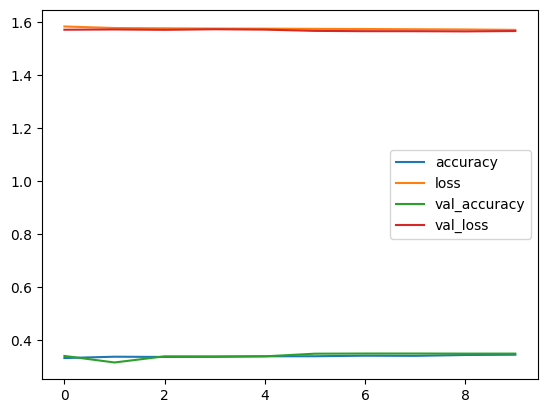

In [108]:
import pandas 
pd.DataFrame(history.history).plot()

In [109]:
pred = model.predict(x_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [110]:
pred

array([[0.10066389, 0.38115922, 0.23581102, 0.11402404, 0.12564716,
        0.04269462],
       [0.12145957, 0.34319296, 0.2626386 , 0.09296705, 0.13429989,
        0.04544186],
       [0.12435877, 0.3178079 , 0.31535986, 0.06950535, 0.12916419,
        0.0438039 ],
       ...,
       [0.11601062, 0.34020275, 0.2909184 , 0.07980771, 0.12809767,
        0.04496286],
       [0.1221382 , 0.32377976, 0.30854416, 0.07218681, 0.12901469,
        0.0443363 ],
       [0.11120005, 0.36834255, 0.24876392, 0.09798031, 0.12785381,
        0.04585938]], dtype=float32)

In [112]:
predictions = np.argmax(pred,axis=1)

In [113]:
evalution_df = pd.DataFrame({'actual':y_test,'prediction':predictions})

In [118]:
evalution_df.head(50)

,actual,prediction
0,2,1
1,1,1
2,1,1
3,2,1
4,4,1
5,0,1
6,3,2
7,1,1
8,3,1
9,1,1


In [ ]:
os.makedirs